## 1. Pendahuluan

**Natural Language Processing (NLP)** adalah bidang AI yang berfokus pada interaksi antara komputer dan bahasa manusia.

### NLP Tasks:

| Task | Deskripsi | Contoh |
|------|-----------|--------|
| **Text Classification** | Kategorisasi teks | Spam detection, sentiment analysis |
| **Named Entity Recognition** | Identifikasi entities | Nama orang, lokasi, organisasi |
| **Machine Translation** | Terjemahan bahasa | English → Indonesian |
| **Text Generation** | Generate teks baru | Chatbots, story generation |
| **Question Answering** | Jawab pertanyaan | QA systems |
| **Text Summarization** | Ringkasan teks | News summarization |

### Evolution of NLP:
1. **Rule-based** (1950s-1990s)
2. **Statistical methods** (1990s-2010s)
3. **Deep Learning** (2010s-present)
4. **Transformers & Large Language Models** (2017-present)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0


## 2. Text Preprocessing

### 2.1 Tokenization

**Tokenization** adalah proses membagi teks menjadi unit-unit kecil (tokens).

**Types of Tokenization:**
- **Character-level**: Setiap karakter adalah token
- **Word-level**: Setiap kata adalah token
- **Subword-level**: Kombinasi (BPE, WordPiece, SentencePiece)

In [2]:
# Sample text
texts = [
    "Machine learning is amazing!",
    "Deep learning transforms NLP.",
    "Transformers are powerful models."
]

# Character-level tokenization
print("Character-level tokenization:")
print(list(texts[0]))
print()

# Word-level tokenization (simple)
print("Word-level tokenization:")
print(texts[0].lower().split())

Character-level tokenization:
['M', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'i', 's', ' ', 'a', 'm', 'a', 'z', 'i', 'n', 'g', '!']

Word-level tokenization:
['machine', 'learning', 'is', 'amazing!']


In [3]:
# Keras TextVectorization layer
text_vectorizer = layers.TextVectorization(
    max_tokens=1000,          # Vocabulary size
    output_mode='int',        # Output integer indices
    output_sequence_length=10  # Pad/truncate to fixed length
)

# Adapt to data (build vocabulary)
text_vectorizer.adapt(texts)

# View vocabulary
vocab = text_vectorizer.get_vocabulary()
print("Vocabulary:")
for i, word in enumerate(vocab[:15]):
    print(f"  {i}: '{word}'")

Vocabulary:
  0: ''
  1: '[UNK]'
  2: 'learning'
  3: 'transforms'
  4: 'transformers'
  5: 'powerful'
  6: 'nlp'
  7: 'models'
  8: 'machine'
  9: 'is'
  10: 'deep'
  11: 'are'
  12: 'amazing'


In [4]:
# Vectorize text
vectorized = text_vectorizer(texts)

print("Original texts:")
for text in texts:
    print(f"  '{text}'")

print("\nVectorized (integer sequences):")
print(vectorized.numpy())

Original texts:
  'Machine learning is amazing!'
  'Deep learning transforms NLP.'
  'Transformers are powerful models.'

Vectorized (integer sequences):
[[ 8  2  9 12  0  0  0  0  0  0]
 [10  2  3  6  0  0  0  0  0  0]
 [ 4 11  5  7  0  0  0  0  0  0]]


### 2.2 Word Embeddings

**Word Embeddings** memetakan kata ke dense vectors di continuous space.

**Properties:**
- Kata dengan makna serupa → vectors berdekatan
- Capture semantic relationships
- king - man + woman ≈ queen

**Popular Embeddings:**
- Word2Vec (Google, 2013)
- GloVe (Stanford, 2014)
- FastText (Facebook, 2016)

In [5]:
# Embedding layer
vocab_size = 10000
embedding_dim = 128

embedding_layer = layers.Embedding(
    input_dim=vocab_size,     # Vocabulary size
    output_dim=embedding_dim,  # Embedding dimension
    mask_zero=True            # Mask padding tokens
)

# Test
sample_indices = tf.constant([[1, 2, 3, 0, 0], [4, 5, 0, 0, 0]])
embeddings = embedding_layer(sample_indices)

print(f"Input shape:  {sample_indices.shape}  (batch, sequence_length)")
print(f"Output shape: {embeddings.shape}  (batch, sequence_length, embedding_dim)")

Input shape:  (2, 5)  (batch, sequence_length)
Output shape: (2, 5, 128)  (batch, sequence_length, embedding_dim)


In [6]:
# Visualisasi embedding space (2D projection)
def visualize_embeddings_concept():
    print("""
    Word Embedding Space (conceptual):
    
                    ↑ Gender
                    │
            queen ● │ ● king
                    │
           woman ●  │  ● man
                    │
    ────────────────┼────────────────→ Royalty
                    │
             girl ● │ ● boy
                    │
    
    Similar words cluster together!
    Semantic relationships preserved as vector operations.
    """)

visualize_embeddings_concept()


    Word Embedding Space (conceptual):
    
                    ↑ Gender
                    │
            queen ● │ ● king
                    │
           woman ●  │  ● man
                    │
    ────────────────┼────────────────→ Royalty
                    │
             girl ● │ ● boy
                    │
    
    Similar words cluster together!
    Semantic relationships preserved as vector operations.
    


## 3. Text Generation dengan RNN

### 3.1 Character-Level Text Generation

**Approach:** Train model untuk predict next character given previous characters.

In [7]:
# Sample text untuk training
shakespeare_sample = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die: to sleep;
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to, 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep: perchance to dream: ay, there's the rub.
"""

print(f"Text length: {len(shakespeare_sample)} characters")

Text length: 437 characters


In [8]:
# Character-level tokenization
chars = sorted(set(shakespeare_sample))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

print(f"Unique characters: {len(chars)}")
print(f"Characters: {chars}")

Unique characters: 37
Characters: ['\n', ' ', "'", ',', '-', '.', ':', ';', 'A', 'D', 'N', 'O', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [9]:
# Prepare training data
def prepare_char_data(text, seq_length=40):
    """Create input-output pairs for character prediction"""
    encoded = [char_to_idx[c] for c in text]
    
    X, y = [], []
    for i in range(len(encoded) - seq_length):
        X.append(encoded[i:i+seq_length])
        y.append(encoded[i+seq_length])
    
    return np.array(X), np.array(y)

seq_length = 40
X_char, y_char = prepare_char_data(shakespeare_sample, seq_length)

print(f"Training samples: {len(X_char)}")
print(f"X shape: {X_char.shape}")
print(f"y shape: {y_char.shape}")

Training samples: 397
X shape: (397, 40)
y shape: (397,)


In [10]:
# Character-level text generation model
n_chars = len(chars)

model_char = keras.Sequential([
    layers.Embedding(n_chars, 32, input_length=seq_length),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128),
    layers.Dense(n_chars, activation='softmax')
])

model_char.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_char.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 3.2 Sampling Strategies

**Temperature Sampling:** Control randomness dalam generation.

$$
P(x_i) = \frac{\exp(z_i / T)}{\sum_j \exp(z_j / T)}
$$

- **T → 0**: Greedy (always pick highest probability)
- **T = 1**: Standard softmax
- **T → ∞**: Uniform random

In [11]:
# Temperature sampling function
def sample_with_temperature(logits, temperature=1.0):
    """Sample from logits with temperature"""
    logits = logits / temperature
    probas = tf.nn.softmax(logits).numpy()
    return np.random.choice(len(probas), p=probas)

# Demonstration
demo_logits = np.array([2.0, 1.0, 0.5, 0.1, 0.1])

print("Effect of Temperature on Probability Distribution:")
print(f"Original logits: {demo_logits}")
print()

for temp in [0.5, 1.0, 2.0]:
    scaled = demo_logits / temp
    probs = tf.nn.softmax(scaled).numpy()
    print(f"Temperature {temp}: {probs.round(3)}")

Effect of Temperature on Probability Distribution:
Original logits: [2.  1.  0.5 0.1 0.1]

Temperature 0.5: [0.813 0.11  0.04  0.018 0.018]
Temperature 1.0: [0.529 0.195 0.118 0.079 0.079]
Temperature 2.0: [0.351 0.213 0.166 0.136 0.136]


In [12]:
# Text generation function
def generate_text(model, start_string, num_chars=200, temperature=1.0):
    """Generate text starting from start_string"""
    # Initialize
    input_text = start_string
    generated = start_string
    
    for _ in range(num_chars):
        # Encode input
        encoded = [char_to_idx.get(c, 0) for c in input_text[-seq_length:]]
        encoded = np.array([encoded])
        
        # Pad if necessary
        if len(encoded[0]) < seq_length:
            encoded = np.pad(encoded, ((0, 0), (seq_length - len(encoded[0]), 0)))
        
        # Predict
        predictions = model.predict(encoded, verbose=0)[0]
        
        # Sample
        predicted_idx = sample_with_temperature(predictions, temperature)
        predicted_char = idx_to_char[predicted_idx]
        
        generated += predicted_char
        input_text += predicted_char
    
    return generated

print("Text generation function ready!")

Text generation function ready!


## 4. Sentiment Analysis

**Sentiment Analysis** adalah task untuk classify sentiment/opini dalam teks.

### 4.1 IMDB Movie Reviews Dataset

In [13]:
# Load IMDB dataset
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = keras.datasets.imdb.load_data(
    num_words=10000  # Vocabulary size
)

print(f"Training samples: {len(X_train_imdb)}")
print(f"Test samples: {len(X_test_imdb)}")
print(f"Sample review length: {len(X_train_imdb[0])} words")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: 25000
Test samples: 25000
Sample review length: 218 words


In [14]:
# Decode review
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = {v + 3: k for k, v in word_index.items()}
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

print("Sample review:")
print(decode_review(X_train_imdb[0][:50]) + "...")
print(f"\nLabel: {'Positive' if y_train_imdb[0] == 1 else 'Negative'}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Sample review:
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved...

Label: Positive


In [15]:
# Pad sequences
maxlen = 200  # Maximum review length

X_train_pad = keras.preprocessing.sequence.pad_sequences(
    X_train_imdb, maxlen=maxlen, padding='post', truncating='post'
)
X_test_pad = keras.preprocessing.sequence.pad_sequences(
    X_test_imdb, maxlen=maxlen, padding='post', truncating='post'
)

print(f"Padded shape: {X_train_pad.shape}")

Padded shape: (25000, 200)


In [16]:
# Sentiment analysis model dengan LSTM
model_sentiment = keras.Sequential([
    layers.Embedding(10000, 128, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_sentiment.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_sentiment.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train
history_sentiment = model_sentiment.fit(
    X_train_pad, y_train_imdb,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)],
    verbose=1
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 304ms/step - accuracy: 0.7101 - loss: 0.5386 - val_accuracy: 0.8448 - val_loss: 0.3576
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - accuracy: 0.8849 - loss: 0.2965 - val_accuracy: 0.8612 - val_loss: 0.3566
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 292ms/step - accuracy: 0.9168 - loss: 0.2263 - val_accuracy: 0.8426 - val_loss: 0.4068
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 286ms/step - accuracy: 0.9229 - loss: 0.2034 - val_accuracy: 0.8380 - val_loss: 0.3794


In [18]:
# Evaluate
loss, accuracy = model_sentiment.evaluate(X_test_pad, y_test_imdb, verbose=0)
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 84.63%


## 5. Encoder-Decoder Architecture

**Encoder-Decoder** (Seq2Seq) untuk tasks dengan variable-length input dan output.

### Use Cases:
- Machine Translation
- Text Summarization
- Question Answering
- Chatbots

In [19]:
# Encoder-Decoder visualization
print("""
Encoder-Decoder Architecture:

     Input Sequence          Output Sequence
    "Hello world"    →      "Halo dunia"

    ┌─────────────────────┐   ┌─────────────────────┐
    │      ENCODER        │   │      DECODER        │
    │  ┌───┬───┬───┐      │   │  ┌───┬───┬───┐      │
    │  │RNN│RNN│RNN│──────┼──→│  │RNN│RNN│RNN│      │
    │  └─↑─┴─↑─┴─↑─┘      │   │  └─↑─┴─↑─┴─↑─┘      │
    │    │   │   │        │   │    │   │   │        │
    └────┼───┼───┼────────┘   └────┼───┼───┼────────┘
         │   │   │                 │   │   │
       Hello world            <SOS> Halo dunia
    
         Context Vector
              ↓
    [Encodes meaning of input]
""")


Encoder-Decoder Architecture:

     Input Sequence          Output Sequence
    "Hello world"    →      "Halo dunia"

    ┌─────────────────────┐   ┌─────────────────────┐
    │      ENCODER        │   │      DECODER        │
    │  ┌───┬───┬───┐      │   │  ┌───┬───┬───┐      │
    │  │RNN│RNN│RNN│──────┼──→│  │RNN│RNN│RNN│      │
    │  └─↑─┴─↑─┴─↑─┘      │   │  └─↑─┴─↑─┴─↑─┘      │
    │    │   │   │        │   │    │   │   │        │
    └────┼───┼───┼────────┘   └────┼───┼───┼────────┘
         │   │   │                 │   │   │
       Hello world            <SOS> Halo dunia
    
         Context Vector
              ↓
    [Encodes meaning of input]



In [20]:
# Simple Encoder-Decoder model
embedding_dim = 256
units = 512
vocab_size = 10000

# Encoder
encoder_inputs = keras.Input(shape=(None,), name='encoder_input')
encoder_embedding = layers.Embedding(vocab_size, embedding_dim)(encoder_inputs)
encoder_lstm = layers.LSTM(units, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = keras.Input(shape=(None,), name='decoder_input')
decoder_embedding = layers.Embedding(vocab_size, embedding_dim)(decoder_inputs)
decoder_lstm = layers.LSTM(units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = layers.Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
seq2seq_model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

print("Encoder-Decoder Model:")
seq2seq_model.summary()

Encoder-Decoder Model:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 256) │  2,560,000 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, None, 256) │  2,560,000 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, 512),     │  1,574,912 │ embedding_3[0][0] │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, None,     │  1,574,912 │ embedding_4[0][0… │
│                     │ 512), (None,      │            │ lstm_4[0][1],     │
│                     │ 512), (None,      │            │ lstm_4[0][2]      │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │  5,130,000 │ lstm_5[0][0]      │
│                     │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,399,824 (51.12 MB)

 Trainable params: 13,399,824 (51.12 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Attention Mechanism

**Problem dengan basic Encoder-Decoder:**
- Single fixed-length context vector menjadi bottleneck
- Sulit untuk long sequences

**Solution: Attention**
- Decoder dapat "attend" ke different parts of input
- Weighted combination of encoder outputs

In [21]:
# Attention mechanism visualization
print("""
Attention Mechanism:

Encoder outputs:  h₁    h₂    h₃    h₄
                   ↓     ↓     ↓     ↓
                 ┌───┬───┬───┬───┐
Attention        │0.1│0.6│0.2│0.1│  ← Attention weights
                 └───┴───┴───┴───┘
                         ↓
Context Vector:   c = Σ αᵢ × hᵢ   (weighted sum)
                         ↓
                    Decoder

At each decoder step:
1. Calculate attention scores
2. Softmax to get attention weights
3. Weighted sum of encoder outputs
4. Use context for prediction
""")


Attention Mechanism:

Encoder outputs:  h₁    h₂    h₃    h₄
                   ↓     ↓     ↓     ↓
                 ┌───┬───┬───┬───┐
Attention        │0.1│0.6│0.2│0.1│  ← Attention weights
                 └───┴───┴───┴───┘
                         ↓
Context Vector:   c = Σ αᵢ × hᵢ   (weighted sum)
                         ↓
                    Decoder

At each decoder step:
1. Calculate attention scores
2. Softmax to get attention weights
3. Weighted sum of encoder outputs
4. Use context for prediction



### 6.1 Types of Attention

| Type | Formula | Description |
|------|---------|-------------|
| **Dot-Product** | $\text{score}(s, h) = s^T h$ | Simple dot product |
| **Scaled Dot-Product** | $\text{score}(s, h) = \frac{s^T h}{\sqrt{d_k}}$ | Scaled for stability |
| **Additive (Bahdanau)** | $\text{score}(s, h) = v^T \tanh(W_s s + W_h h)$ | Learnable weights |
| **Multiplicative (Luong)** | $\text{score}(s, h) = s^T W h$ | General matrix |

Dimana:
- $s$ = decoder hidden state
- $h$ = encoder hidden state
- $d_k$ = key dimension

In [22]:
# Bahdanau Attention (Additive)
class BahdanauAttention(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W1 = layers.Dense(units)  # For encoder output
        self.W2 = layers.Dense(units)  # For decoder state
        self.V = layers.Dense(1)       # Attention score
    
    def call(self, query, values):
        """
        query: decoder hidden state (batch, hidden_size)
        values: encoder outputs (batch, max_len, hidden_size)
        """
        # Expand query dimension
        query_with_time = tf.expand_dims(query, 1)  # (batch, 1, hidden_size)
        
        # Score
        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(query_with_time)
        ))  # (batch, max_len, 1)
        
        # Attention weights
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Context vector
        context = attention_weights * values
        context = tf.reduce_sum(context, axis=1)  # (batch, hidden_size)
        
        return context, attention_weights

# Test
attention = BahdanauAttention(64)
query = tf.random.normal([4, 128])      # Decoder state
values = tf.random.normal([4, 10, 128])  # Encoder outputs

context, weights = attention(query, values)
print(f"Query shape:   {query.shape}")
print(f"Values shape:  {values.shape}")
print(f"Context shape: {context.shape}")
print(f"Attention weights shape: {weights.shape}")

Query shape:   (4, 128)
Values shape:  (4, 10, 128)
Context shape: (4, 128)
Attention weights shape: (4, 10, 1)


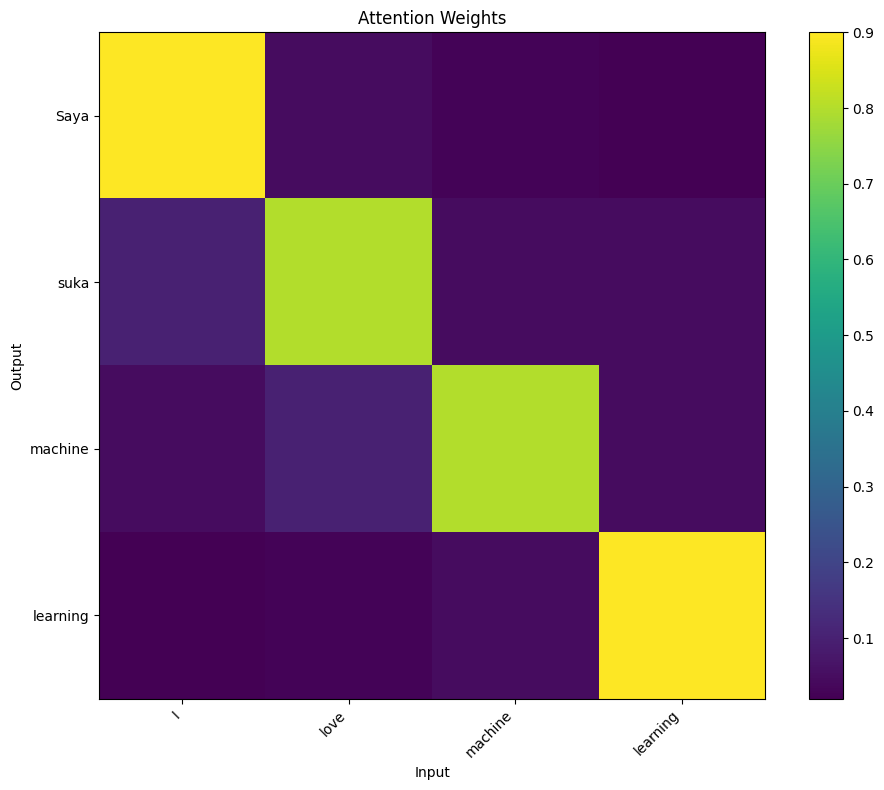

In [23]:
# Visualize attention weights
def plot_attention_weights(attention_weights, input_tokens, output_tokens):
    """Visualize attention alignment"""
    fig, ax = plt.subplots(figsize=(10, 8))
    
    im = ax.imshow(attention_weights, cmap='viridis')
    
    ax.set_xticks(range(len(input_tokens)))
    ax.set_yticks(range(len(output_tokens)))
    ax.set_xticklabels(input_tokens, rotation=45, ha='right')
    ax.set_yticklabels(output_tokens)
    
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')
    ax.set_title('Attention Weights')
    
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

# Example attention visualization
sample_attention = np.array([
    [0.9, 0.05, 0.03, 0.02],
    [0.1, 0.8, 0.05, 0.05],
    [0.05, 0.1, 0.8, 0.05],
    [0.02, 0.03, 0.05, 0.9]
])

plot_attention_weights(
    sample_attention,
    ['I', 'love', 'machine', 'learning'],
    ['Saya', 'suka', 'machine', 'learning']
)

## 7. Transformer Architecture

**Transformer** (Vaswani et al., 2017) - "Attention is All You Need"

### Key Innovations:
- **Self-Attention**: Attend to different positions in same sequence
- **Multi-Head Attention**: Multiple attention heads in parallel
- **No recurrence**: Fully parallelizable
- **Positional Encoding**: Inject position information

In [24]:
# Transformer architecture overview
print("""
Transformer Architecture:

┌─────────────────────────────────────────────────────────────────┐
│                         ENCODER                                  │
│  ┌───────────────────────────────────────────────────────────┐  │
│  │                    Encoder Layer (N×)                      │  │
│  │  ┌─────────────────┐    ┌─────────────────────────────┐   │  │
│  │  │  Multi-Head     │    │  Feed Forward Network       │   │  │
│  │  │  Self-Attention │ →  │  (FFN)                      │   │  │
│  │  └─────────────────┘    └─────────────────────────────┘   │  │
│  │  + Add & Norm           + Add & Norm                       │  │
│  └───────────────────────────────────────────────────────────┘  │
│                              ↑                                   │
│                   Input Embedding + Positional Encoding          │
└─────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────┐
│                         DECODER                                  │
│  ┌───────────────────────────────────────────────────────────┐  │
│  │                    Decoder Layer (N×)                      │  │
│  │  ┌───────────┐  ┌───────────────────┐  ┌───────────────┐  │  │
│  │  │  Masked   │  │  Cross-Attention  │  │  FFN          │  │  │
│  │  │  Self-Attn│→ │  (Enc-Dec)        │→ │               │  │  │
│  │  └───────────┘  └───────────────────┘  └───────────────┘  │  │
│  └───────────────────────────────────────────────────────────┘  │
└─────────────────────────────────────────────────────────────────┘
""")


Transformer Architecture:

┌─────────────────────────────────────────────────────────────────┐
│                         ENCODER                                  │
│  ┌───────────────────────────────────────────────────────────┐  │
│  │                    Encoder Layer (N×)                      │  │
│  │  ┌─────────────────┐    ┌─────────────────────────────┐   │  │
│  │  │  Multi-Head     │    │  Feed Forward Network       │   │  │
│  │  │  Self-Attention │ →  │  (FFN)                      │   │  │
│  │  └─────────────────┘    └─────────────────────────────┘   │  │
│  │  + Add & Norm           + Add & Norm                       │  │
│  └───────────────────────────────────────────────────────────┘  │
│                              ↑                                   │
│                   Input Embedding + Positional Encoding          │
└─────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────┐
│             

### 7.1 Self-Attention

**Self-Attention** memungkinkan setiap posisi attend ke semua posisi lain dalam sequence.

**Formula:**
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

Dimana:
- $Q$ = Query matrix
- $K$ = Key matrix
- $V$ = Value matrix
- $d_k$ = dimension of keys

In [25]:
# Scaled Dot-Product Attention
def scaled_dot_product_attention(query, key, value, mask=None):
    """Calculate attention weights and output"""
    # Q × K^T
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    # Scale
    dk = tf.cast(tf.shape(key)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    
    # Mask (optional)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    
    # Softmax
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    # Output
    output = tf.matmul(attention_weights, value)
    
    return output, attention_weights

# Test
q = tf.random.normal([1, 4, 64])  # (batch, seq_len, d_model)
k = tf.random.normal([1, 4, 64])
v = tf.random.normal([1, 4, 64])

output, weights = scaled_dot_product_attention(q, k, v)
print(f"Query shape:     {q.shape}")
print(f"Output shape:    {output.shape}")
print(f"Attention shape: {weights.shape}")

Query shape:     (1, 4, 64)
Output shape:    (1, 4, 64)
Attention shape: (1, 4, 4)


### 7.2 Multi-Head Attention

**Multi-Head Attention** menjalankan multiple attention functions in parallel.

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O
$$

In [26]:
# Multi-Head Attention
class MultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % num_heads == 0
        
        self.depth = d_model // num_heads
        
        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)
        self.dense = layers.Dense(d_model)
    
    def split_heads(self, x, batch_size):
        """Split last dimension into (num_heads, depth)"""
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        
        output = self.dense(concat_attention)
        return output, attention_weights

# Test
mha = MultiHeadAttention(d_model=512, num_heads=8)
x = tf.random.normal([1, 10, 512])
output, attn = mha(x, x, x)

print(f"Input shape:  {x.shape}")
print(f"Output shape: {output.shape}")

Input shape:  (1, 10, 512)
Output shape: (1, 10, 512)


### 7.3 Positional Encoding

Karena Transformer tidak memiliki recurrence, perlu **Positional Encoding** untuk inject position information.

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)
$$
$$
PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)
$$

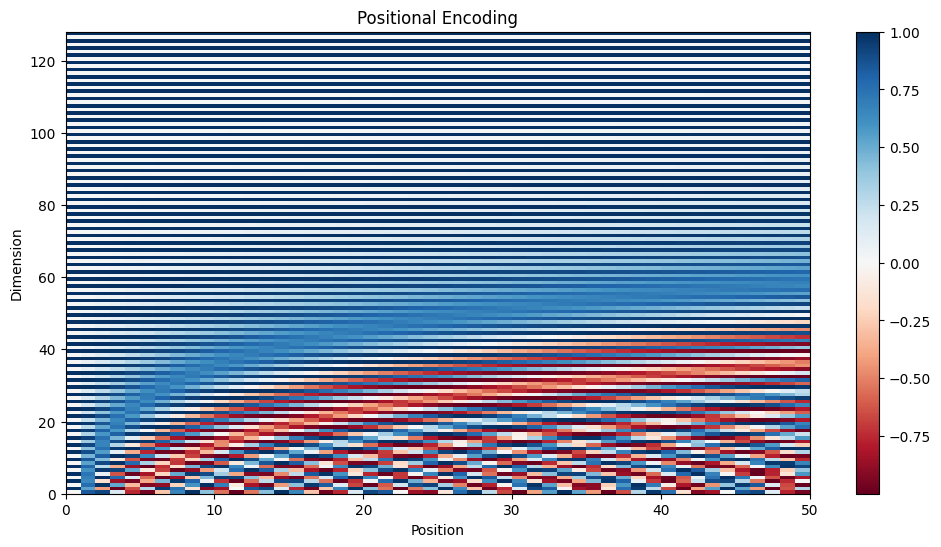

In [27]:
# Positional Encoding
def positional_encoding(max_len, d_model):
    """Generate positional encoding matrix"""
    positions = np.arange(max_len)[:, np.newaxis]
    dimensions = np.arange(d_model)[np.newaxis, :]
    
    angles = positions / np.power(10000, (2 * (dimensions // 2)) / d_model)
    
    # Apply sin to even indices, cos to odd
    angles[:, 0::2] = np.sin(angles[:, 0::2])
    angles[:, 1::2] = np.cos(angles[:, 1::2])
    
    return tf.cast(angles[np.newaxis, :, :], dtype=tf.float32)

# Generate and visualize
pe = positional_encoding(50, 128)

plt.figure(figsize=(12, 6))
plt.pcolormesh(pe[0].numpy().T, cmap='RdBu')
plt.xlabel('Position')
plt.ylabel('Dimension')
plt.title('Positional Encoding')
plt.colorbar()
plt.show()

### 7.4 Using Keras MultiHeadAttention

In [28]:
# Keras built-in MultiHeadAttention
mha_keras = layers.MultiHeadAttention(
    num_heads=8,
    key_dim=64,  # d_k per head
    value_dim=64
)

# Test
query = tf.random.normal([2, 10, 512])
value = tf.random.normal([2, 20, 512])

output = mha_keras(query, value)
print(f"Query shape: {query.shape}")
print(f"Value shape: {value.shape}")
print(f"Output shape: {output.shape}")

Query shape: (2, 10, 512)
Value shape: (2, 20, 512)
Output shape: (2, 10, 512)


## 8. Pretrained Language Models

### 8.1 Evolution of Language Models

| Model | Year | Parameters | Key Innovation |
|-------|------|------------|----------------|
| **ELMo** | 2018 | 94M | Contextualized embeddings |
| **GPT** | 2018 | 117M | Transformer decoder pretraining |
| **BERT** | 2018 | 340M | Bidirectional Transformer encoder |
| **GPT-2** | 2019 | 1.5B | Larger scale, zero-shot |
| **T5** | 2019 | 11B | Text-to-text framework |
| **GPT-3** | 2020 | 175B | Few-shot learning |
| **GPT-4** | 2023 | ~1T | Multimodal, RLHF |

In [29]:
# BERT vs GPT comparison
print("""
BERT vs GPT:

┌────────────────┬─────────────────────┬─────────────────────┐
│                │        BERT         │        GPT          │
├────────────────┼─────────────────────┼─────────────────────┤
│ Architecture   │ Encoder only        │ Decoder only        │
│ Direction      │ Bidirectional       │ Left-to-right       │
│ Pretraining    │ MLM + NSP           │ Language modeling   │
│ Best for       │ Understanding       │ Generation          │
│ Tasks          │ Classification,     │ Text generation,    │
│                │ NER, QA             │ Completion          │
└────────────────┴─────────────────────┴─────────────────────┘

MLM = Masked Language Modeling
NSP = Next Sentence Prediction
""")


BERT vs GPT:

┌────────────────┬─────────────────────┬─────────────────────┐
│                │        BERT         │        GPT          │
├────────────────┼─────────────────────┼─────────────────────┤
│ Architecture   │ Encoder only        │ Decoder only        │
│ Direction      │ Bidirectional       │ Left-to-right       │
│ Pretraining    │ MLM + NSP           │ Language modeling   │
│ Best for       │ Understanding       │ Generation          │
│ Tasks          │ Classification,     │ Text generation,    │
│                │ NER, QA             │ Completion          │
└────────────────┴─────────────────────┴─────────────────────┘

MLM = Masked Language Modeling
NSP = Next Sentence Prediction



### 8.2 Using Hugging Face Transformers

In [30]:
# Example: Using pretrained model (pseudo-code)
print("""
Using Hugging Face Transformers:

# Installation
# pip install transformers

from transformers import pipeline

# Sentiment Analysis
classifier = pipeline('sentiment-analysis')
result = classifier("I love machine learning!")
# Output: [{'label': 'POSITIVE', 'score': 0.9998}]

# Text Generation
generator = pipeline('text-generation', model='gpt2')
result = generator("Machine learning is", max_length=50)

# Question Answering
qa = pipeline('question-answering')
result = qa(
    question="What is machine learning?",
    context="Machine learning is a subset of AI..."
)

# Translation
translator = pipeline('translation_en_to_fr')
result = translator("Hello, how are you?")
""")


Using Hugging Face Transformers:

# Installation
# pip install transformers

from transformers import pipeline

# Sentiment Analysis
classifier = pipeline('sentiment-analysis')
result = classifier("I love machine learning!")
# Output: [{'label': 'POSITIVE', 'score': 0.9998}]

# Text Generation
generator = pipeline('text-generation', model='gpt2')
result = generator("Machine learning is", max_length=50)

# Question Answering
qa = pipeline('question-answering')
result = qa(
    question="What is machine learning?",
    context="Machine learning is a subset of AI..."
)

# Translation
translator = pipeline('translation_en_to_fr')
result = translator("Hello, how are you?")



In [31]:
# Fine-tuning pretrained model (pseudo-code)
print("""
Fine-tuning BERT for Text Classification:

from transformers import TFBertForSequenceClassification, BertTokenizer

# Load pretrained model
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize data
encodings = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

# Compile and train
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=model.compute_loss,
    metrics=['accuracy']
)

model.fit(
    dict(encodings),
    labels,
    epochs=3,
    batch_size=16
)
""")


Fine-tuning BERT for Text Classification:

from transformers import TFBertForSequenceClassification, BertTokenizer

# Load pretrained model
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize data
encodings = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

# Compile and train
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=model.compute_loss,
    metrics=['accuracy']
)

model.fit(
    dict(encodings),
    labels,
    epochs=3,
    batch_size=16
)



## 9. Kesimpulan

### Key Takeaways:

1. **Text Preprocessing:**
   - Tokenization: character, word, subword level
   - Word Embeddings untuk dense representations
   - TextVectorization di Keras

2. **RNN untuk NLP:**
   - Text generation (character/word level)
   - Sentiment analysis
   - Temperature sampling untuk generation

3. **Encoder-Decoder:**
   - Sequence-to-sequence tasks
   - Machine translation, summarization
   - Bottleneck problem dengan fixed context vector

4. **Attention Mechanism:**
   - Dynamic focus pada relevant parts
   - Bahdanau (additive) vs Luong (multiplicative)
   - Solusi untuk long sequences

5. **Transformer:**
   - Self-attention: attend to all positions
   - Multi-head attention: multiple attention heads
   - Positional encoding: inject position info
   - Fully parallelizable

6. **Pretrained Models:**
   - BERT: bidirectional, understanding tasks
   - GPT: unidirectional, generation tasks
   - Fine-tuning untuk specific tasks

### Architecture Selection:

| Task | Recommended |
|------|-------------|
| Text Classification | BERT + fine-tuning |
| Text Generation | GPT / Transformer Decoder |
| Translation | Transformer Encoder-Decoder |
| Sentiment Analysis | BERT / LSTM |
| Question Answering | BERT variants |

In [32]:
# Summary visualization
print("""
┌─────────────────────────────────────────────────────────────────┐
│                    NLP Architecture Evolution                    │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   RNN/LSTM → Encoder-Decoder → Attention → Transformer → LLMs   │
│                                                                  │
│   Sequential   │  Seq2Seq      │ Focus on     │ Parallel       │
│   processing   │  tasks        │ relevant     │ Self-attention │
│                │               │ parts        │                │
├─────────────────────────────────────────────────────────────────┤
│                    Modern Approach                               │
│                                                                  │
│   1. Use Pretrained Model (BERT, GPT, T5)                       │
│   2. Fine-tune on your specific task                            │
│   3. Much better than training from scratch!                    │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
""")


┌─────────────────────────────────────────────────────────────────┐
│                    NLP Architecture Evolution                    │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   RNN/LSTM → Encoder-Decoder → Attention → Transformer → LLMs   │
│                                                                  │
│   Sequential   │  Seq2Seq      │ Focus on     │ Parallel       │
│   processing   │  tasks        │ relevant     │ Self-attention │
│                │               │ parts        │                │
├─────────────────────────────────────────────────────────────────┤
│                    Modern Approach                               │
│                                                                  │
│   1. Use Pretrained Model (BERT, GPT, T5)                       │
│   2. Fine-tune on your specific task                            │
│   3. Much better than training from scratch